In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the Iris dataset
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Select features (attributes) for clustering (e.g., sepal_length, sepal_width, petal_length, petal_width)
X = df.iloc[:, 1:-1]  # Exclude the first column (id) and the last column (species)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Standardize the feature matrix (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [13]:
print(inertia)

[600.0, 223.73200573676345, 192.0371740919003, 114.68221609937964, 91.29544474066984, 81.7602613286062, 80.98238131032987, 68.08623905064636, 59.38528882045365, 52.98999721015859]


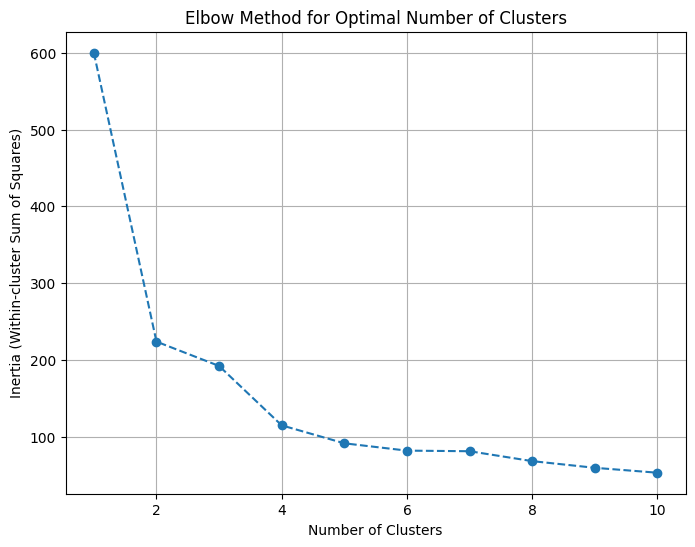

In [14]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(X)

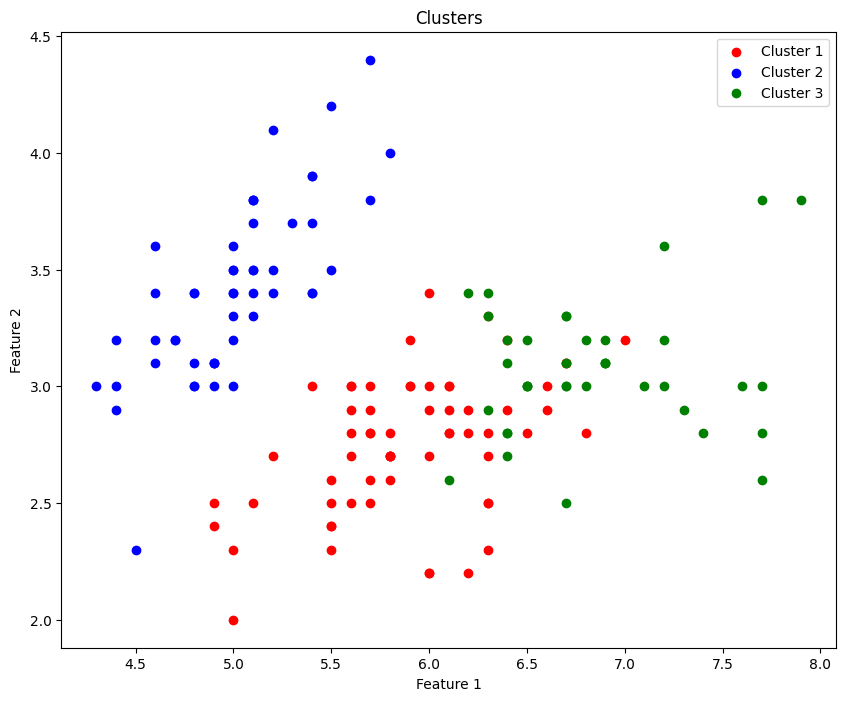

In [37]:
x_np = X.to_numpy()

plt.figure(figsize=(10, 8))
plt.scatter(x_np[y_kmeans == 0, 0], x_np[y_kmeans == 0, 1], c='red', label='Cluster 1')
plt.scatter(x_np[y_kmeans == 1, 0], x_np[y_kmeans == 1, 1], c='blue', label='Cluster 2')
plt.scatter(x_np[y_kmeans == 2, 0], x_np[y_kmeans == 2, 1], c='green', label='Cluster 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters')
plt.legend()
plt.show()